<a href="https://colab.research.google.com/github/samuelquek0/dbs23012024/blob/main/Day_3_German_Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd

In [79]:
df = pd.read_csv("/content/drive/MyDrive/Loan Default II (Employed).csv")

In [80]:
df.isnull().any()

Index            False
Employed         False
Bank Balance     False
Annual Salary    False
Defaulted?       False
dtype: bool

In [82]:
df.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [83]:
df = pd.get_dummies(df,columns=['Employed'], drop_first=True)

In [84]:
df

,Index,Bank Balance,Annual Salary,Defaulted?,Employed_1
0,1,8754.36,532339.56,0,1
1,2,9806.16,145273.56,0,0
2,3,12882.60,381205.68,0,1
3,4,6351.00,428453.88,0,1
4,5,9427.92,461562.00,0,1
...,...,...,...,...,...
9995,9996,8538.72,635908.56,0,1
9996,9997,9095.52,235928.64,0,1
9997,9998,10144.92,703633.92,0,1
9998,9999,18828.12,440029.32,0,1


array([[<Axes: title={'center': 'Index'}>,
        <Axes: title={'center': 'Bank Balance'}>],
       [<Axes: title={'center': 'Annual Salary'}>,
        <Axes: title={'center': 'Defaulted?'}>],
       [<Axes: title={'center': 'Employed_1'}>, <Axes: >]], dtype=object)

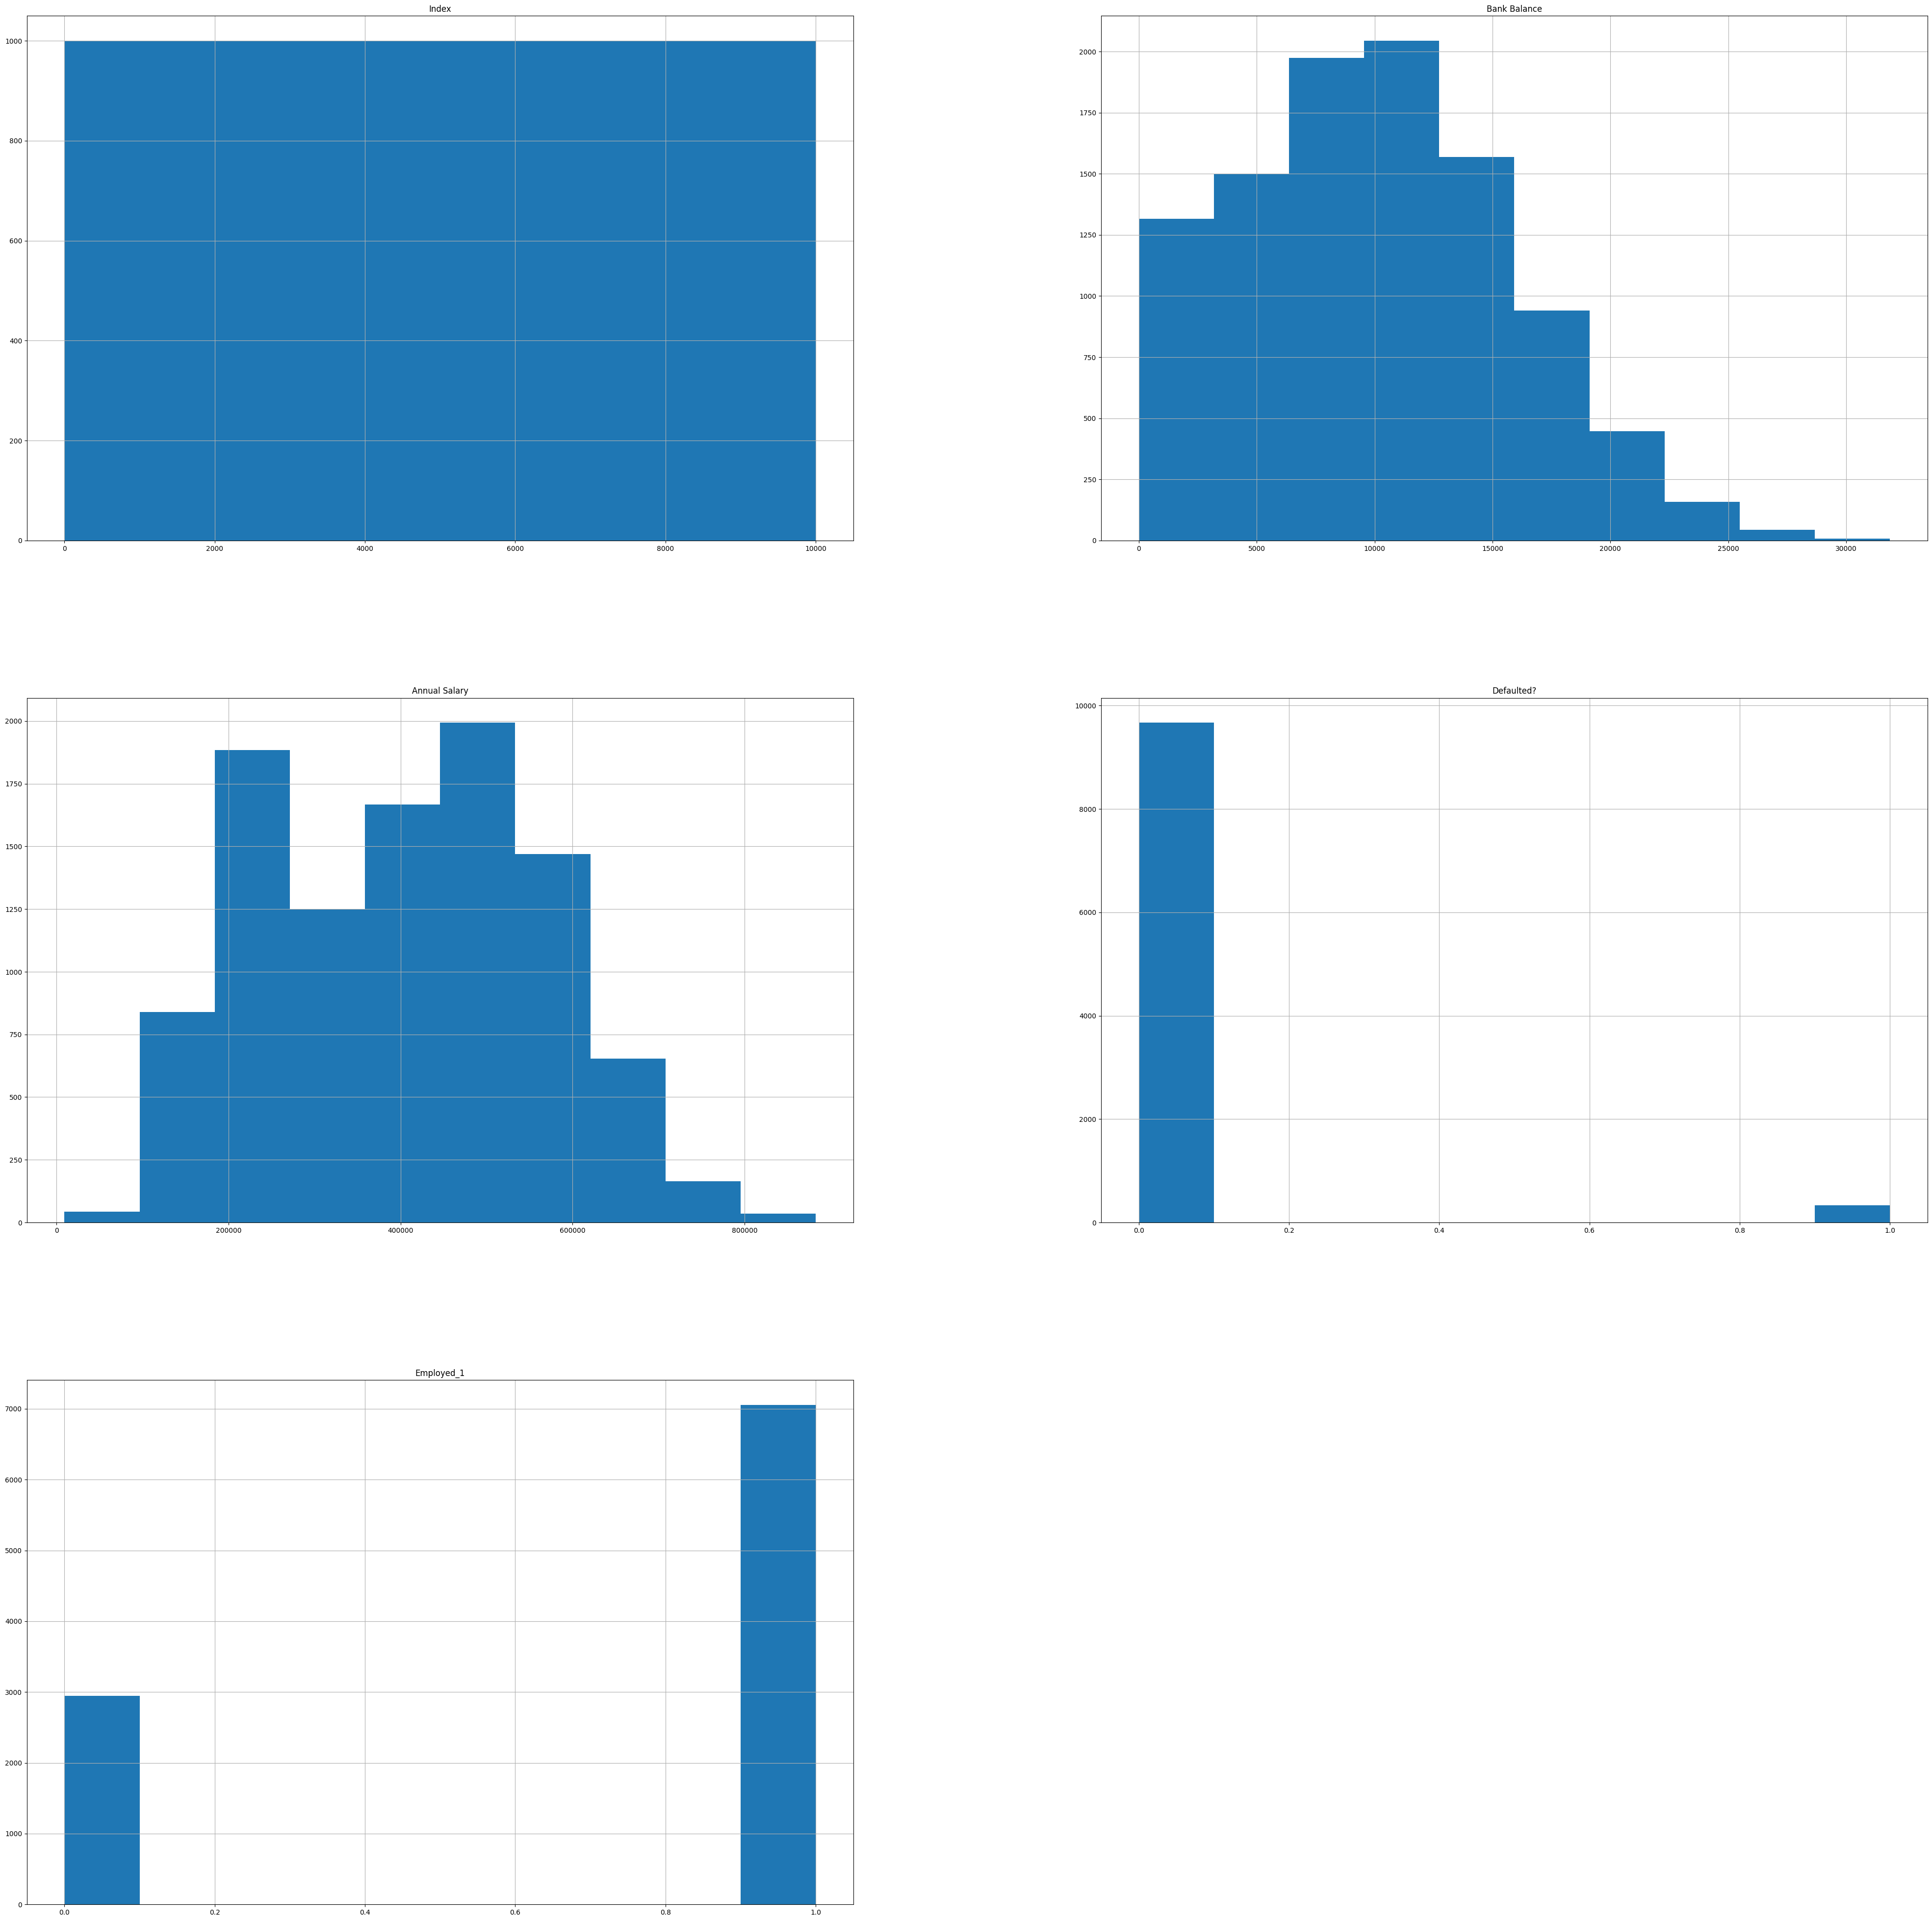

In [85]:
df.hist(figsize=(50,50))

In [86]:
import seaborn as sns

<Axes: >

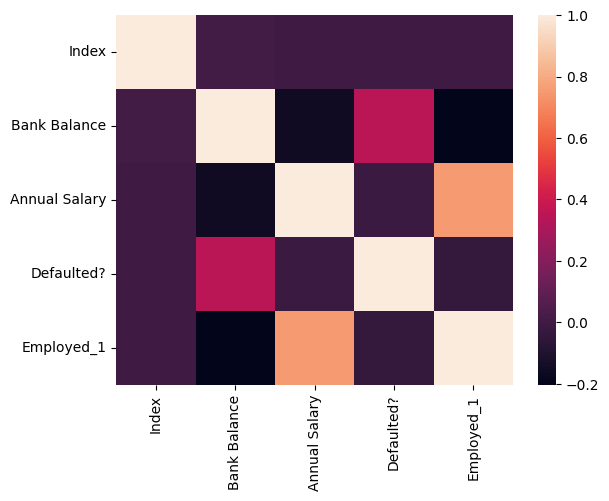

In [87]:
sns.heatmap(df.corr())

<Axes: xlabel='Employed_1', ylabel='count'>

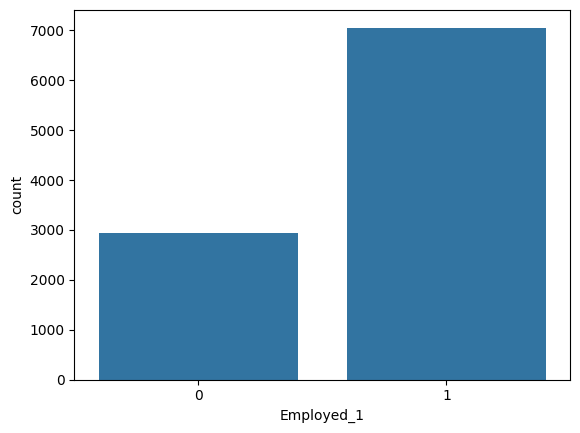

In [88]:
sns.countplot(df,x="Employed_1")

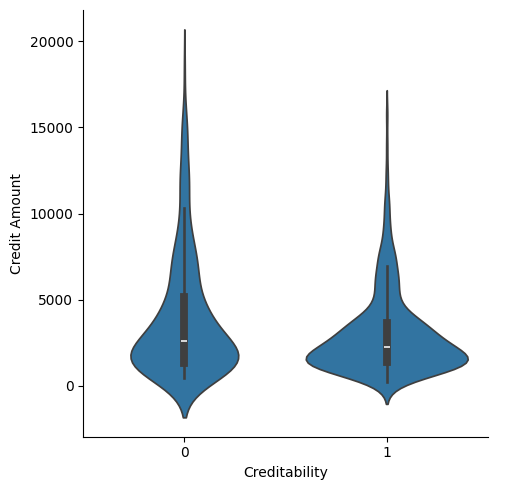

In [35]:
sns.catplot(df,x="Creditability",y="Credit Amount",kind="violin")

<Axes: ylabel='Credit Amount'>

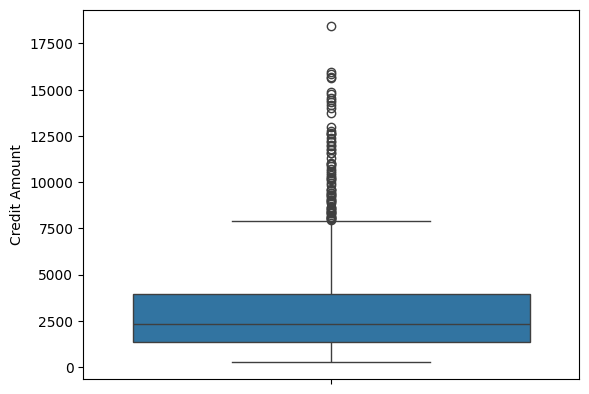

In [36]:
sns.boxplot(data=df["Credit Amount"])

In [37]:
X = df.drop(columns="Creditability")

In [38]:
Y = df["Creditability"]

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [41]:
from scipy import stats

In [42]:
X_train["Credit Amount"] = stats.zscore(X_train["Credit Amount"])

In [43]:
X_test["Credit Amount"] = stats.zscore(X_test["Credit Amount"])

In [44]:
from sklearn import linear_model

In [45]:
model = linear_model.LogisticRegression(max_iter=2000)

In [46]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=2000)

In [47]:
pred = model.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix

In [48]:
cm = confusion_matrix(Y_test,pred)

In [50]:
print(cm)

[[ 26  42]
 [ 30 152]]


In [51]:
print("accuracy is ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

accuracy is  0.712


In [52]:
from sklearn import tree

In [53]:
model = tree.DecisionTreeClassifier()

In [54]:
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print(cm)
print("accuracy is ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

[[ 33  35]
 [ 44 138]]
accuracy is  0.684


In [55]:
from sklearn import ensemble

In [56]:
model = ensemble.RandomForestClassifier()

In [ ]:
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print(cm)
print("accuracy is ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

[[ 33  48]
 [ 16 153]]
accuracy is  0.744


In [57]:
model = ensemble.GradientBoostingClassifier()

In [58]:
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print(cm)
print("accuracy is ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

[[ 28  40]
 [ 25 157]]
accuracy is  0.74


In [59]:
from sklearn import neural_network
model = neural_network.MLPClassifier(max_iter=2000)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred)
print(cm)
print("Accuracy is ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

#no meaning as neural network not used for structured data
#random state usually used in exams to standardise results

[[ 42  26]
 [ 40 142]]
Accuracy is  0.736


In [60]:
from lce import LCEClassifier

In [61]:
model = LCEClassifier()

In [62]:
model.fit(X_train, Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)
print(cm)
print("accuracy is", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

[[ 33  35]
 [ 27 155]]
accuracy is 0.752


In [65]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [69]:
model = Sequential()
model.add(Dense(100,input_dim=47,activation="relu")) #default is 100, relu is regularisation equivalent in machine learning (normalising)
model.add(Dropout(0.1)) #prevent overfitting (train test very good but test set collapse)
model.add(Dense(100,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation="sigmoid"))

In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               4800      
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15001 (58.60 KB)
Trainable params: 15001 (58.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [75]:
h = model.fit(X_train,Y_train,batch_size=5,epochs=300)

Epoch 1/300
150/150 [==============================] - 1s 4ms/step - loss: 0.0904 - accuracy: 0.9693
Epoch 2/300
150/150 [==============================] - 1s 4ms/step - loss: 0.0891 - accuracy: 0.9707
Epoch 3/300
150/150 [==============================] - 1s 4ms/step - loss: 0.1071 - accuracy: 0.9613
Epoch 4/300
150/150 [==============================] - 1s 4ms/step - loss: 0.1135 - accuracy: 0.9587
Epoch 5/300
150/150 [==============================] - 0s 2ms/step - loss: 0.0922 - accuracy: 0.9600
Epoch 6/300
150/150 [==============================] - 0s 2ms/step - loss: 0.0662 - accuracy: 0.9800
Epoch 7/300
150/150 [==============================] - 0s 2ms/step - loss: 0.0761 - accuracy: 0.9773
Epoch 8/300
150/150 [==============================] - 0s 2ms/step - loss: 0.0667 - accuracy: 0.9813
Epoch 9/300
150/150 [==============================] - 0s 2ms/step - loss: 0.0842 - accuracy: 0.9720
Epoch 10/300
150/150 [==============================] - 0s 2ms/step - loss: 0.0589 - accura

In [73]:
import matplotlib.pyplot as plt

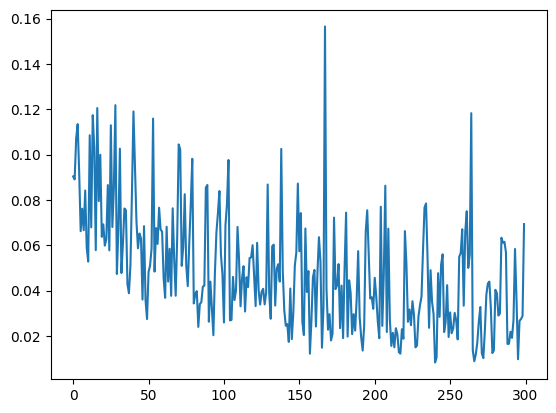

In [76]:
plt.plot(h.history["loss"])

In [77]:
pred = model.predict(X_test)

8/8 [==============================] - 0s 4ms/step


In [78]:
import numpy
pred = numpy.where(pred>=0.5,1,0)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,pred)
print(cm)
print("accuracy is ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

[[ 36  32]
 [ 30 152]]
accuracy is  0.752
